In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# 1. Carregar o dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [4]:
# 2. Padronizar os dados (muito importante para redes neurais)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Criar o modelo MLP (rede neural)
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # uma camada oculta com 100 neurônios
    activation='relu',          # função de ativação ('identity', 'logistic', 'tanh', 'relu')
    solver='adam',              # otimizador ('lbfgs', 'sgd', 'adam')
    alpha=0.0001,               # parâmetro de regularização L2 (weight decay)
    learning_rate='constant',  # tipo de ajuste da taxa de aprendizado
    learning_rate_init=0.001,  # taxa de aprendizado inicial
    max_iter=1000,             # número máximo de iterações
    random_state=42
)

# 5. Treinar o modelo
mlp_model.fit(X_train, y_train)

# 6. Avaliar o modelo
y_pred = mlp_model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Acurácia: 0.9736842105263158

Relatório de Classificação:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



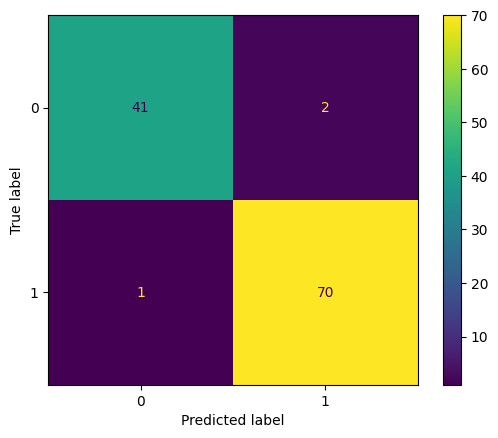

In [5]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()